In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Salary_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Train Test Split

In [23]:
X = df.iloc[:,:-1]  # Independent column
y = df.iloc[:,-1] # Dependent column

In [24]:
X.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

In [26]:
y_train

28    122392.0
24    109432.0
12     56958.0
0      39344.0
4      39892.0
16     66030.0
5      56643.0
13     57082.0
11     55795.0
22    101303.0
1      46206.0
2      37732.0
25    105583.0
3      43526.0
21     98274.0
26    116970.0
18     81364.0
29    121873.0
20     91739.0
7      54446.0
10     63219.0
14     61112.0
19     93941.0
6      60151.0
Name: Salary, dtype: float64

In [27]:
y_test

27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
Name: Salary, dtype: float64

### Feature Scaling

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)

In [22]:
df.shape

(30, 2)

In [30]:
X_train_scaled

array([[ 1.77445774],
       [ 1.21912622],
       [-0.41216011],
       [-1.41869849],
       [-1.03690807],
       [-0.03036969],
       [-0.79395053],
       [-0.37745189],
       [-0.41216011],
       [ 0.94146047],
       [-1.34928205],
       [-1.27986561],
       [ 1.32325088],
       [-1.10632451],
       [ 0.66379471],
       [ 1.49679198],
       [ 0.24729607],
       [ 1.84387418],
       [ 0.55967005],
       [-0.68982587],
       [-0.44686833],
       [-0.23861901],
       [ 0.28200429],
       [-0.75924231]])

In [31]:
X_test_scaled = scaler.fit_transform(X_test)

In [32]:
X_test_scaled

array([[ 1.62737604],
       [-0.39429816],
       [ 1.02517522],
       [-0.22224078],
       [-1.12554202],
       [-0.9104703 ]])

### Model Building

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test_scaled)

In [36]:
y_pred

array([118394.38647561,  63502.82376142, 102043.70822032,  68174.44612007,
        43648.42873714,  49487.95668545])

### Model Performance

In [37]:
mse = mean_squared_error(y_test, y_pred)

In [38]:
mse

150943210.41798493

In [39]:
accuracy = r2_score(y_test, y_pred)

In [40]:
accuracy

0.7044941090191734

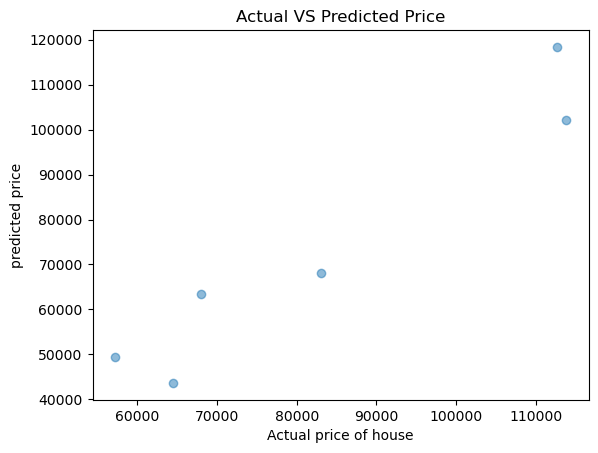

In [41]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of house')
plt.ylabel('predicted price')
plt.title('Actual VS Predicted Price')
plt.show()

In [42]:
print('Slope (m):', model.coef_[0])
print('Intercept (c):' ,model.intercept_)

Slope (m): 27151.537425833674
Intercept (c): 74208.625
